In [1]:
import utils
import visualization
import numpy as np

from IPython.display import Image as Img, display
from dec_tswap.agent import RandomAgent, DecTSWAPParams, SmartRandomAgent, AStarAgent
from manavlib.gen.params import ExperimentParams, DiscreteAgentParams

In [2]:
h = 20
w = 20
grid_map = np.zeros((h, w), dtype=bool)
agents_num = 5


start_st_set = set()
start_states = np.zeros((agents_num, 2), dtype=np.int64)

ag_count = 0
while True:
    pos = np.random.randint([0, 0], [h, w], size=2)
    if tuple(pos) in start_st_set:
        continue
    start_st_set.add(tuple(pos))
    start_states[ag_count] = pos
    ag_count += 1
    if ag_count >= agents_num:
        break
        
        
        
goals_st_set = set()
goal_states = np.zeros((agents_num, 2), dtype=np.int64)

ag_count = 0
while True:
    pos = np.random.randint([0, 0], [h, w], size=2)
    if tuple(pos) in goals_st_set:
        continue
    goals_st_set.add(tuple(pos))
    goal_states[ag_count] = pos
    ag_count += 1
    if ag_count >= agents_num:
        break

exp_params = ExperimentParams()
exp_params.max_steps = 100
exp_params.timestep = 1
exp_params.xy_goal_tolerance = 0

In [3]:
summary, steps_log = utils.run_experiment(start_states,
                   goal_states,
                   grid_map,
                   1.0,
                   agents_num,
                   AStarAgent,
                   [DiscreteAgentParams() for i in range(agents_num)],
                   DecTSWAPParams(),
                   exp_params,
                   True)

success_str = "success"
makespan_str = "makespan"
flowtime_str = "flowtime"
runtime_str = "runtime"

print(summary.header())
print(summary)

success  collision  collision_obst   makespan   flowtime    runtime
      0          1               0         10         50      0.055


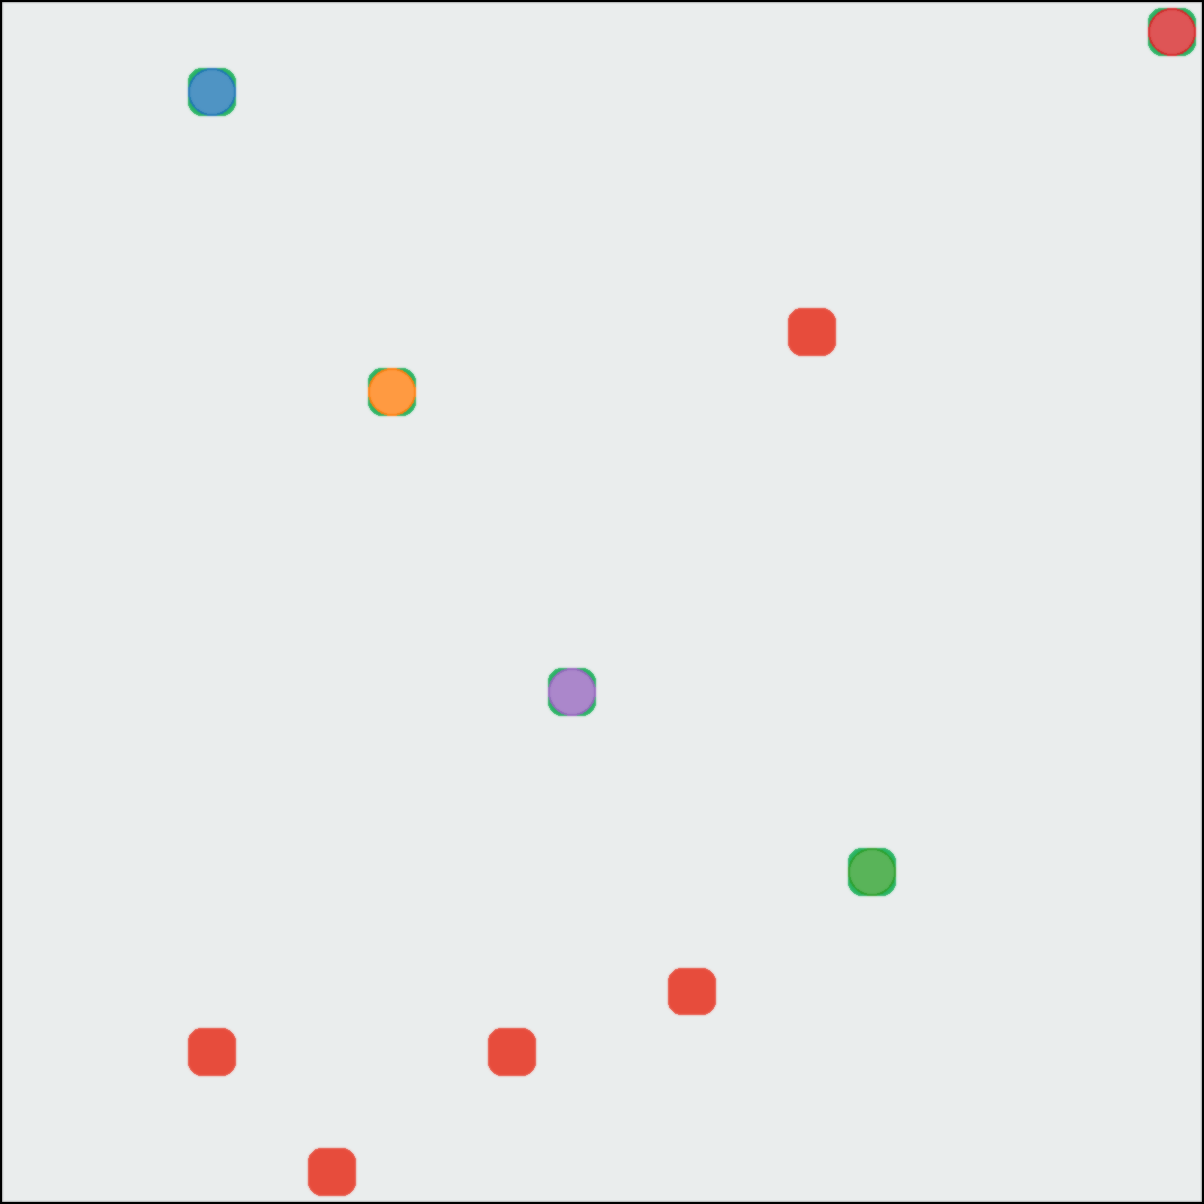

In [4]:
output_filename = "animated_trajectories"
visualization.draw(grid_map, start_states, goal_states, steps_log, 60, 2, output_filename)
display(Img(filename=f"{output_filename}.png"))